In [1]:
#import the numerical libraries we shall need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
import math as m

In [2]:
#GDAX bitcoin exchange data
import cbpro
import dateutil.parser as dp

In [4]:
#we are only allowed 300 days of data from the exchange
#using 600 to 300 days ago for training
#end_date= datetime.today()
today = datetime.today()
end_date = today - pd.DateOffset(days=300)
start_date = end_date - pd.DateOffset(days=300)
print(start_date)
print(end_date)

2018-06-24 10:38:03.427900
2019-04-20 10:38:03.427900


In [5]:
#get the data
client = cbpro.PublicClient() 
a = client.get_product_historic_rates('BTC-EUR',granularity=86400, start=start_date ,end=end_date)
b2 = pd.DataFrame(a)
b2.columns = [ 'time', 'low', 'high', 'open', 'close', 'volume' ]
result = b2
result['time'] = result['time'].apply(datetime.utcfromtimestamp)

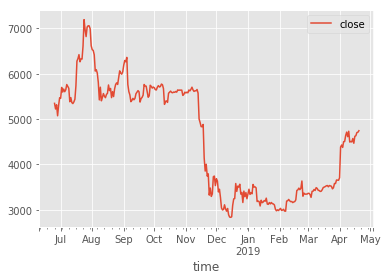

In [6]:
#plot out data
from matplotlib import style
resultstoplot = [result['time'],result['close']]
style.use("ggplot")
result.plot(x='time', y='close')
plt.show()

In [7]:
#assume a maximum holding period of 5 days
#target value of 0.1
hperiod = 5
close_price = result[['time','close']]
hbar = pd.DataFrame()
hbar[['t1']] = result[['time']] + pd.DateOffset(days=hperiod)
#find closet index of 
#hbar['trgt'] = 0.1
#close_price.set_index('time', inplace=True)
hbar

,t1
0,2019-04-25 00:00:00
1,2019-04-24 00:00:00
2,2019-04-23 00:00:00
3,2019-04-22 00:00:00
4,2019-04-21 00:00:00
5,2019-04-20 00:00:00
6,2019-04-19 00:00:00
7,2019-04-18 00:00:00
8,2019-04-17 00:00:00
9,2019-04-16 00:00:00


In [8]:
returns = close_price['close'].pct_change()
a = returns.rolling(5).std()
vol = a.fillna(0.01)
vol
#tst1 = pd.DataFrame()
#tst1 = result[['time']] + pd.DateOffset(days=5)
#tst = (close_price.index.get_loc(tst1, method='nearest'))

0      0.010000
1      0.010000
2      0.010000
3      0.010000
4      0.010000
5      0.013081
6      0.020710
7      0.021016
8      0.021156
9      0.021148
10     0.027138
11     0.030518
12     0.029469
13     0.031650
14     0.035381
15     0.020719
16     0.021329
17     0.017845
18     0.017739
19     0.067737
20     0.066170
21     0.068555
22     0.066853
23     0.065992
24     0.010526
25     0.013588
26     0.012651
27     0.017262
28     0.015687
29     0.015779
         ...   
270    0.024113
271    0.045240
272    0.046948
273    0.047352
274    0.043106
275    0.041261
276    0.025015
277    0.015811
278    0.041157
279    0.043083
280    0.034214
281    0.035360
282    0.037904
283    0.026690
284    0.014677
285    0.028205
286    0.026581
287    0.026326
288    0.030151
289    0.028590
290    0.013032
291    0.012894
292    0.016002
293    0.023522
294    0.023848
295    0.024480
296    0.027996
297    0.038877
298    0.035679
299    0.038445
Name: close, Length: 300

In [9]:
from pandas.core.common import flatten
vol.reset_index(drop=True, inplace=True)
c = vol.values.tolist()

hbar['trgt']  = c
ptS1=[2,4]

In [10]:
close_price.loc[close_price['time'].between('2020-02-02','2020-02-10',inclusive=True)]

,time,close


In [11]:
labels = pd.DataFrame(np.zeros((len(close_price),1)))
labels.columns=['label']
nd =5
out = hbar[['t1']].copy(deep=True)
#Define barriers
if ptS1[0] > 0:pt = ptS1[0]*hbar['trgt']
else:pt =pd.Series(index=hbar.index) #NaNs
if ptS1[1] > 0:s1 = -ptS1[1]*hbar['trgt']
else:s1 = pd.Series(index=hbar.index)
#labels
l= 10
startdate = close_price['time'][l]
enddate = startdate + pd.DateOffset(days=nd)
df = close_price.loc[close_price['time'].between(startdate,enddate,inclusive=True)]
df0 = df.set_index('time')
df0 = (df0/ close_price['close'][l]-1)
dummytime = startdate+ pd.DateOffset(days=nd+1)
#upper barrier
gtseq = df0[df0['close'].gt(pt[l])].index
if (len(gtseq) == 0):
    out.loc[l,'pt'] = dummytime
else:
    index_value = min(df0[df0['close'].gt(pt[l])].index)
    out.loc[l,'pt'] = index_value
#lower barrier
ltseq = df0[df0['close'].lt(s1[l])].index
if (len(ltseq) == 0):
    out.loc[l,'sl'] = dummytime
else:
    index_value = min(df0[df0['close'].lt(s1[l])].index)
    out.loc[l,'sl'] = index_value
if (out.loc[l,'pt'] <= hbar.loc[l,'t1']) and (out.loc[l,'pt'] < out.loc[l,'sl']):
   labels.loc[l,'label'] = 1
elif(out.loc[l,'pt'] <= enddate):  
  #we would have hit the the bsarrier if we hadn't stopped out
   labels.loc[l,'label'] = 0  
else:
   #we did not hit the target position expired
   labels.loc[l,'label'] = 0 

In [12]:
for l in range(0,len(close_price)):
    startdate = close_price['time'][l]
    enddate = startdate + pd.DateOffset(days=nd)
    df = close_price.loc[close_price['time'].between(startdate,enddate,inclusive=True)]
    df0 = df.set_index('time')
    df0 = (df0/ close_price['close'][l]-1)
    dummytime = startdate+ pd.DateOffset(days=nd+1)
    #upper barrier
    gtseq = df0[df0['close'].gt(pt[l])].index
    if (len(gtseq) == 0):
       out.loc[l,'pt'] = dummytime
    else:
       index_value = min(df0[df0['close'].gt(pt[l])].index)
       out.loc[l,'pt'] = index_value
    #lower barrier
    ltseq = df0[df0['close'].lt(s1[l])].index
    if (len(ltseq) == 0):
      out.loc[l,'sl'] = dummytime
    else:
      index_value = min(df0[df0['close'].lt(s1[l])].index)
      out.loc[l,'sl'] = index_value
    if (out.loc[l,'pt'] <= hbar.loc[l,'t1']) and (out.loc[l,'pt'] < out.loc[l,'sl']):
       labels.loc[l,'label'] = 1
    elif(out.loc[l,'pt'] <= enddate):  
       #we would have hit the the bsarrier if we hadn't stopped out
       labels.loc[l,'label'] = 0  
    else:
       #we did not hit the target position expired
       labels.loc[l,'label'] = 0 

In [13]:
y=labels

In [14]:
from talib import EMA

In [15]:
result
short_ema = EMA(result['close'], timeperiod=2)
short_ema.fillna(short_ema[1], inplace=True)
long_ema  = EMA(result['close'], timeperiod=8)
long_ema.fillna(long_ema[9], inplace=True) 

In [16]:
result

,time,low,high,open,close,volume
0,2019-04-20,4688.01,4764.98,4705.03,4740.00,541.918260
1,2019-04-19,4630.66,4758.71,4700.01,4706.56,667.173307
2,2019-04-18,4627.02,4737.50,4629.26,4699.38,1147.240031
3,2019-04-17,4585.00,4666.25,4617.47,4629.26,1164.805585
4,2019-04-16,4446.47,4630.27,4461.89,4617.46,1234.941188
5,2019-04-15,4400.00,4589.99,4567.97,4463.82,1413.412692
6,2019-04-14,4461.00,4585.75,4494.61,4567.98,595.943332
7,2019-04-13,4472.78,4537.98,4500.00,4492.81,462.516750
8,2019-04-12,4355.00,4530.23,4489.99,4502.55,1232.438858
9,2019-04-11,4401.00,4747.97,4730.00,4490.00,2050.028181


In [17]:
X = result[['open','volume']]

In [18]:
print(type(short_ema))
X = X.assign(short_ema=short_ema)
X = X.assign(long_ema=long_ema)
X

<class 'pandas.core.series.Series'>


,open,volume,short_ema,long_ema
0,4705.03,541.918260,4723.280000,4567.579985
1,4700.01,667.173307,4723.280000,4567.579985
2,4629.26,1147.240031,4707.346667,4567.579985
3,4617.47,1164.805585,4655.288889,4567.579985
4,4461.89,1234.941188,4630.069630,4567.579985
5,4567.97,1413.412692,4519.236543,4567.579985
6,4494.61,595.943332,4551.732181,4567.579985
7,4500.00,462.516750,4512.450727,4614.658750
8,4489.99,1232.438858,4505.850242,4589.745694
9,4730.00,2050.028181,4495.283414,4567.579985


In [19]:
import sklearn
from sklearn import svm

In [20]:
#define models
clf = svm.SVC()

In [21]:
#convert to arrays
y1 = y.values
X1 = X.values
yv = y1.flatten()

In [22]:
#scale mean and variance to (0,1)
from sklearn import preprocessing
X_scaled = preprocessing.scale(X1)
X_scaled

array([[ 0.10175013, -0.82360537,  0.11954552, -0.00243169],
       [ 0.09760051, -0.69877461,  0.11954552, -0.00243169],
       [ 0.03911726, -0.22033405,  0.10632681, -0.00243169],
       ...,
       [ 0.52702874, -0.33561187,  0.56803712,  0.69349452],
       [ 0.62960381, -0.35238444,  0.54346652,  0.66108732],
       [ 0.5836521 ,  0.03998345,  0.60394173,  0.65916316]])

In [23]:
clf.fit(X_scaled, yv)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
#Test on last 300 hundred days
today = datetime.today()
end_date = today 
start_date = end_date - pd.DateOffset(days=300)
print(start_date)
print(end_date)

2019-04-20 10:41:25.232571
2020-02-14 10:41:25.232571


In [25]:
client = cbpro.PublicClient() 
a = client.get_product_historic_rates('BTC-EUR',granularity=86400, start=start_date ,end=end_date)
b2 = pd.DataFrame(a)
b2.columns = [ 'time', 'low', 'high', 'open', 'close', 'volume' ]
result = b2
result['time'] = result['time'].apply(datetime.utcfromtimestamp)

In [26]:
hperiod = 5
close_price = result[['time','close']]
hbar = pd.DataFrame()
hbar[['t1']] = result[['time']] + pd.DateOffset(days=hperiod)

In [27]:
returns = close_price['close'].pct_change()
a = returns.rolling(5).std()
vol = a.fillna(0.01)

In [28]:
vol.reset_index(drop=True, inplace=True)
c = vol.values.tolist()

hbar['trgt']  = c
ptS1=[2,4]

In [29]:
for l in range(0,len(close_price)):
    startdate = close_price['time'][l]
    enddate = startdate + pd.DateOffset(days=nd)
    df = close_price.loc[close_price['time'].between(startdate,enddate,inclusive=True)]
    df0 = df.set_index('time')
    df0 = (df0/ close_price['close'][l]-1)
    dummytime = startdate+ pd.DateOffset(days=nd+1)
    #upper barrier
    gtseq = df0[df0['close'].gt(pt[l])].index
    if (len(gtseq) == 0):
       out.loc[l,'pt'] = dummytime
    else:
       index_value = min(df0[df0['close'].gt(pt[l])].index)
       out.loc[l,'pt'] = index_value
    #lower barrier
    ltseq = df0[df0['close'].lt(s1[l])].index
    if (len(ltseq) == 0):
      out.loc[l,'sl'] = dummytime
    else:
      index_value = min(df0[df0['close'].lt(s1[l])].index)
      out.loc[l,'sl'] = index_value
    if (out.loc[l,'pt'] <= hbar.loc[l,'t1']) and (out.loc[l,'pt'] < out.loc[l,'sl']):
       labels.loc[l,'label'] = 1
    elif(out.loc[l,'pt'] <= enddate):  
       #we would have hit the the bsarrier if we hadn't stopped out
       labels.loc[l,'label'] = 0  
    else:
       #we did not hit the target position expired
       labels.loc[l,'label'] = 0 

In [30]:
y=labels

,label
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [31]:
short_ema = EMA(result['close'], timeperiod=2)
short_ema.fillna(short_ema[1], inplace=True)
long_ema  = EMA(result['close'], timeperiod=8)
long_ema.fillna(long_ema[9], inplace=True) 

In [32]:
X = result[['open','volume']]
y1 = y.values
X1 = X.values
yv = y1.flatten()

In [34]:
X = X.assign(short_ema=short_ema)
X = X.assign(long_ema=long_ema)
X

,open,volume,short_ema,long_ema
0,9457.45,442.434182,9485.475000,9097.099151
1,9529.44,2246.625026,9485.475000,9097.099151
2,9419.91,1788.950441,9516.885000,9097.099151
3,9038.00,2270.833950,9452.228333,9097.099151
4,9280.44,2230.429810,9176.082778,9097.099151
5,9065.74,1414.015974,9247.794259,9097.099151
6,8964.18,905.614624,9123.084753,9097.099151
7,8902.12,1339.413713,9017.148251,9283.751250
8,8745.33,1649.638497,8939.529417,9198.633194
9,8294.49,2377.723470,8807.663139,9097.099151


In [39]:
X_scaled = preprocessing.scale(X)

In [40]:
y_predict = clf.predict(X_scaled)

In [41]:
y_predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [43]:
yv

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1.